In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM,Dense, Input, Embedding, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# loading the training data
train = pd.read_csv(r'/content/drive/MyDrive/train.csv')

In [4]:
train.shape
train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [5]:
# Reading word embeddings from a GloVe file and storing them in a dictionary called 'embedding_index'
embedding_index={}
f = open(r"/content/drive/MyDrive/glove.6B.100d.txt", encoding='utf-8')
for line in f:
  values=line.split()
  word = values[0]
  wts = np.asarray(values[-100:],dtype='float32')
  embedding_index[word]=wts
f.close()

In [6]:
# To get word vectors from the GloVe file associated with the word:'today'
embedding_index['today']

array([-0.19939  ,  0.37846  ,  0.52093  ,  0.28347  , -0.1898   ,
       -0.20947  , -0.23286  ,  0.14185  , -0.034916 , -0.36006  ,
       -0.0046717, -0.25207  ,  0.31364  , -0.34879  ,  0.032268 ,
       -0.45078  ,  0.011292 ,  0.090903 , -0.62866  ,  0.0079579,
        0.28065  ,  0.34158  , -0.25593  ,  0.11521  ,  0.10571  ,
       -0.45827  ,  0.32193  , -0.29186  ,  0.11443  ,  0.17972  ,
       -0.31633  ,  0.40085  , -0.24405  , -0.050205 ,  0.16485  ,
        0.5001   ,  0.11756  ,  0.043875 , -0.060235 , -0.66571  ,
       -0.40628  , -0.21691  ,  0.068156 , -0.38058  , -0.4512   ,
       -0.26966  ,  0.45961  , -0.23446  , -0.26416  , -1.1617   ,
        0.18417  , -0.53088  ,  0.54179  ,  0.78295  , -0.54864  ,
       -2.0634   , -0.63427  ,  0.095073 ,  1.9649   ,  0.47031  ,
       -0.54401  ,  0.73015  , -0.34352  , -0.43033  ,  0.27555  ,
        0.025185 ,  0.35053  ,  0.46295  ,  0.40837  , -0.011836 ,
        0.34553  , -0.17297  , -0.13765  , -0.23182  ,  0.3898

In [7]:
from sklearn.model_selection import train_test_split
Train_train, Test_test=train_test_split(train, test_size=0.25)

In [8]:
x_train=Train_train['question_text']
y_train=Train_train['target']
x_test=Test_test['question_text']
y_test=Test_test['target']

In [9]:
# Adds a new column to dataframe 'train' with the name:'length'
train['length']=[len(x) for x in train['question_text']]

In [10]:
# To get the maximum and minimum values in the 'length' column of the DataFrame train
train['length'].max(),train['length'].min()

(1017, 1)

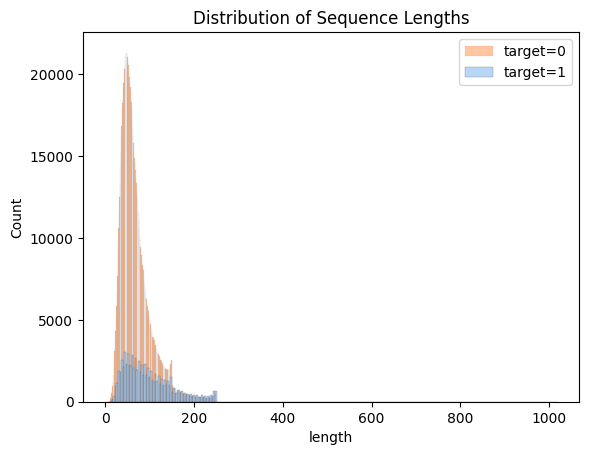

In [11]:
# Create a histogram of the distribution of sequence lengths in the train DataFrame, with separate histograms for rows where the 'target' column is equal to 0 and 1
sns.histplot(train.loc[train['target'] == 0, 'length'], kde=False, label='target=0', color=sns.color_palette('pastel')[1])
sns.histplot(train.loc[train['target'] == 1, 'length'], kde=False, label='target=1', color=sns.color_palette('pastel')[0])
plt.title('Distribution of Sequence Lengths')
plt.legend()
plt.show()

In [12]:
max_len=251
# To create a Tokenizer object named 'Tk' for tokenizing text data.
Tk=Tokenizer(char_level=False,split=' ')
# Tokenizer learns the vocabulary and tokenizes the text in x_train
Tk.fit_on_texts(x_train)

In [13]:
# To calculate the number of unique words (or tokens) in your text data, which is the vocabulary size of the tokenizer('Tk')
vocab_size=len(Tk.word_index)

In [14]:
vocab_size

189073

In [15]:
# To convert the text sequences in your training dataset x_train into sequences of integers
seq_train=Tk.texts_to_sequences(x_train)
# To convert the text sequences in your test dataset x_test into a matrix format.
seq_test=Tk.texts_to_matrix(x_test)

In [16]:
# Padding the x_train and x_test files to the max. length taken
seq_train_matrix=sequence.pad_sequences(seq_train,maxlen=max_len)
seq_test_matrix=sequence.pad_sequences(seq_test,maxlen=max_len)

In [17]:
# To initialize the embedding layer in a deep learning model with pre-trained word embeddings.
embedding_matrix=np.zeros((vocab_size+1,100))

In [19]:
# To fill the embedding_matrix with pre-trained word vectors obtained from the embedding_index dictionary
for word,i in Tk.word_index.items():
  # To retrieve the pre-trained word vector for the current word word from the embedding_index dictionary.
  embed_vector=embedding_index.get(word)

  if embed_vector is not None:
    embedding_matrix[i]=embed_vector
  if embed_vector is None:
    print(word)

Streaming output truncated to the last 5000 lines.
hinduism​
availabile
afreservist
gorguts
nithyananda's
'relocation
bonus'
“gibisi
yok”
grasslands'
sillakidum
mhadev
wittytrades
bangli's
prepatellar
swiftshader
ernomous
termor
brhamins
oneplus5t
avegeta
allahadbad
hypersensivity
boled
madanapalli
chainsmoker
adiploma
mangment
apriso
intle
idexes
3ghz
superfiction
rodolphus
hayers
batnoises
zavion
heimdell
etymologic
nambudri
cafib
'cm
anada
infedelity
bantuan
prission
coseca
insomnia'
knex
forground
riddler´s
stanography
216284
unuse
adsanity
yaost
mormino
livingston's
salties
freshies
jewplicate
prupose
nailbed
crox
gdx
'ouhh
myscreenguard
5095
transviste
eze's
'independence'
ethanaavathu
nnamma
“wing
dyb
khardition
clientel
aevery
panzerlied
pacinian
stupidsid
13xx
autoplaying
bittersteel
kataleena
ususage
rituels
vollyball
​and
musturbutation
nonesense
muliple
contray
lips”
dolphins'
homestreet
inhanfe
comportamental
cenralized
qx30
eveion
sinophone
saeba
monstera
warang
president

In [20]:
# Defining a neural network model using Keras
inputs=Input(name='question_text',shape=[max_len])
embed=Embedding(vocab_size+1,100,input_length=max_len,mask_zero=True,
                weights=[embedding_matrix],trainable=False)(inputs)

lstm_layer=LSTM(50)(embed)

dense1=Dense(10,activation='relu')(lstm_layer)
dr1=Dropout(0.2)(dense1)

final_layer=Dense(1,activation='sigmoid')(dr1)

model=Model(inputs=inputs,outputs=final_layer)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ question_text             │ (None, 251)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 251, 100)       │     18,907,400 │ question_text[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 251)            │              0 │ question_text[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 50)             │         30,200 │ embedding[0][0],       │
│                           │                        │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 10)             │            510 │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 10)             │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │             11 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 18,938,121 (72.24 MB)

 Trainable params: 30,721 (120.00 KB)

 Non-trainable params: 18,907,400 (72.13 MB)

In [21]:
model.save('/content/drive/MyDrive/Project3.h5')

In [22]:
model.save('/content/drive/MyDrive/Project3.keras')


In [ ]:
# Compiling and training your Keras model using the Adam optimizer and binary cross-entropy loss function.
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(seq_train_matrix,y_train, validation_data=[seq_test_matrix,y_test], epochs=10,batch_size=50)